# The most important chapter in the book

In [1]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
path

Path('/home/vishwa/.fastai/data/mnist_sample')

In [4]:
path.ls()

(#3) [Path('/home/vishwa/.fastai/data/mnist_sample/labels.csv'),Path('/home/vishwa/.fastai/data/mnist_sample/valid'),Path('/home/vishwa/.fastai/data/mnist_sample/train')]

In [5]:
Path.BASE_PATH = path

In [10]:
doc(Path.BASE_PATH)

In [11]:
print(Path.BASE_PATH)

/home/vishwa/.fastai/data/mnist_sample


In [12]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [13]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [14]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [15]:
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [16]:
a = (1, 11, 2)
x = sorted(a)
print(x)

[1, 2, 11]


In [17]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

### In the next code cell, we put the image into a dataframe and color code it
 

In [22]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df
df.style.set_properties(**{'font-size':'5pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


##

### Numpy arrays can be jagged but Pytorch Tensors cannot be jagged 

## A simple ML model

### The function

In [23]:
def f(x): return x**2

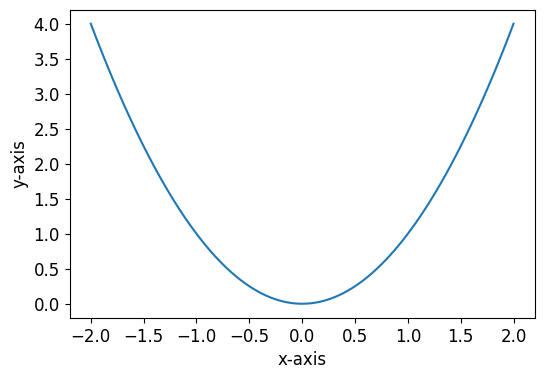

In [25]:
plot_function(f, 'x-axis', 'y-axis')

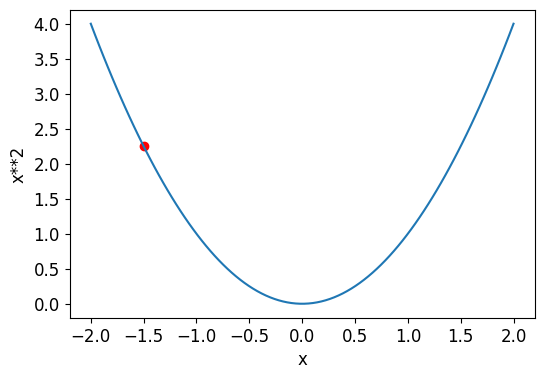

In [26]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

### using a single value

In [27]:
x_tensor = tensor(3.).requires_grad_()

In [28]:
y_tensor = f(x_tensor)
y_tensor

tensor(9., grad_fn=<PowBackward0>)

In [29]:
y_tensor.backward()

In [31]:
x_tensor.grad

tensor(6.)

### Using an array

In [32]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [35]:
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [36]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

### SGD Example

In [44]:
time = torch.arange(0,10).float(); 
time

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

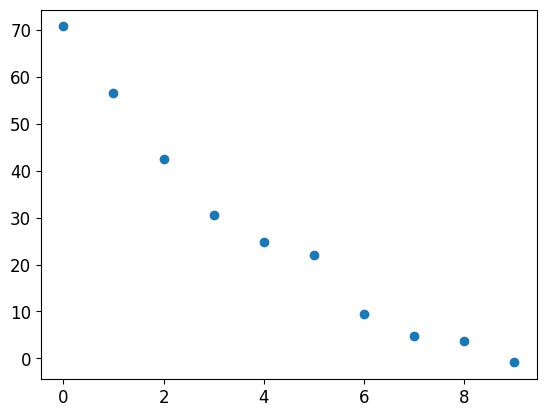

In [46]:
speed = torch.randn(10)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [47]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [48]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [49]:
params = torch.randn(3).requires_grad_()
params

tensor([-1.1267, -0.2858, -1.0935], requires_grad=True)

In [50]:
orig_params = params.clone()
orig_params

tensor([-1.1267, -0.2858, -1.0935], grad_fn=<CloneBackward0>)

In [51]:
preds = f(time, params)
preds

tensor([ -1.0935,  -2.5060,  -6.1719, -12.0912, -20.2640, -30.6902, -43.3699, -58.3030, -75.4895, -94.9295], grad_fn=<AddBackward0>)

In [52]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,300)

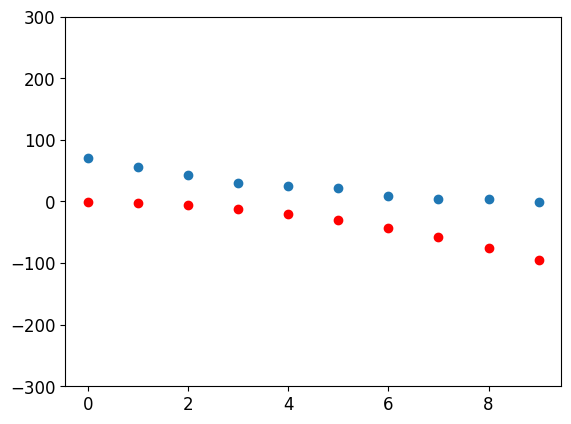

In [53]:
show_preds(preds)

In [54]:
# Calculating the loss
loss = mse(preds, speed)
loss

tensor(3950.1089, grad_fn=<MeanBackward0>)

In [55]:
loss.backward()

In [57]:
params.data

tensor([-1.0860, -0.2798, -1.0923])

In [58]:
orig_params

tensor([-1.1267, -0.2858, -1.0935], grad_fn=<CloneBackward0>)

In [56]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [59]:
preds = f(time,params)
mse(preds, speed)

tensor(3783.5593, grad_fn=<MeanBackward0>)

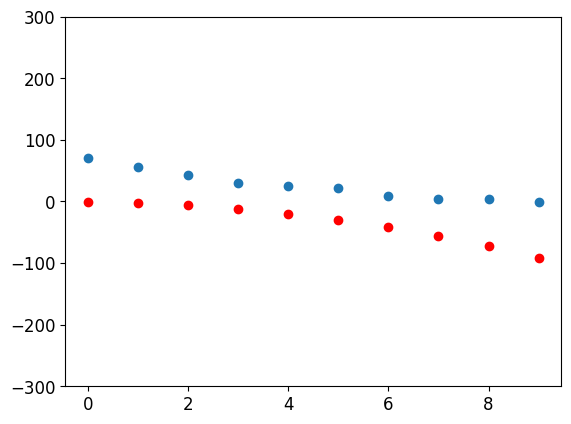

In [60]:
show_preds(preds)

In [61]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [62]:
for i in range(10): apply_step(params)

3783.559326171875
3627.240966796875
3480.525390625
3342.821533203125
3213.578125
3092.272705078125
2978.418212890625
2871.55712890625
2771.259765625
2677.12255859375


In [83]:
params = orig_params.detach().requires_grad_()

In [84]:
params

tensor([ 0.0788, -0.0808, -1.0330], requires_grad=True)

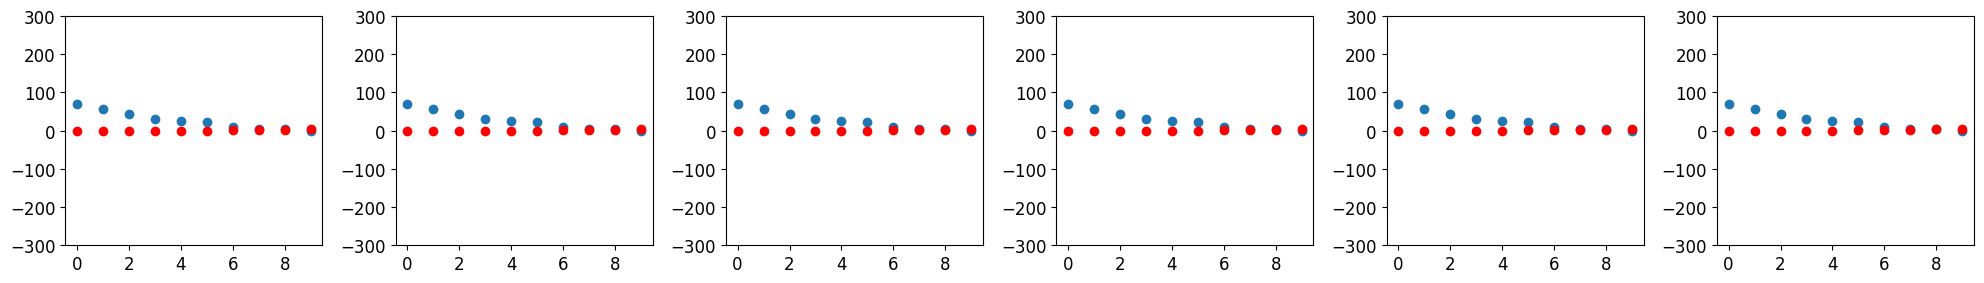

In [78]:
_,axs = plt.subplots(1,6,figsize=(20,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

tensor([ 0.0788, -0.0808, -1.0330], requires_grad=True)

In [86]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

28

In [90]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [91]:
len(stacked_threes.shape)

3

In [92]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [93]:
train_x.shape

torch.Size([12396, 784])

In [98]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [99]:
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [100]:
doc(zip())

In [101]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [108]:
len(dset)

12396

In [109]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

NameError: name 'valid_3_tens' is not defined